In [59]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

# Read in data
df = pd.read_csv(r'D:\PythonScripts\Data\movies1.csv')

In [60]:
# Read data

df.head()

,name,rating,genre,year,released,score,director,writer,star,country,budget,gross,company,runtime
0,Stand by Me,R,Adventure,1986,22/08/1986,8.1,Rob Reiner,Stephen King,Wil Wheaton,USA,8000000,52287414,Columbia Pictures Corporation,89
1,Top Gun,PG,Action,1986,16/05/1986,6.9,Tony Scott,Jim Cash,Tom Cruise,USA,15000000,179800601,Paramount Pictures,110
2,Aliens,R,Action,1986,18/07/1986,8.4,James Cameron,James Cameron,Sigourney Weaver,USA,18500000,85160248,Twentieth Century Fox Film Corporation,137
3,Ferris Bueller's Day Off,PG-13,Comedy,1986,11/06/1986,7.8,John Hughes,John Hughes,Matthew Broderick,USA,6000000,70136369,Paramount Pictures,103
4,Pretty in Pink,PG-13,Comedy,1986,28/02/1986,6.8,Howard Deutch,John Hughes,Molly Ringwald,USA,9000000,40471663,Paramount Pictures,96


In [61]:
# Check for missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%


In [62]:
# Data types per column

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime       int64
dtype: object

In [63]:
# Data cleaning

df['budget'] = df['budget'].astype('int64')

df['gross'] = df['gross'].astype('int64')

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime       int64
dtype: object

In [64]:
df

,name,rating,genre,year,released,score,director,writer,star,country,budget,gross,company,runtime
0,Stand by Me,R,Adventure,1986,22/08/1986,8.1,Rob Reiner,Stephen King,Wil Wheaton,USA,8000000,52287414,Columbia Pictures Corporation,89
1,Top Gun,PG,Action,1986,16/05/1986,6.9,Tony Scott,Jim Cash,Tom Cruise,USA,15000000,179800601,Paramount Pictures,110
2,Aliens,R,Action,1986,18/07/1986,8.4,James Cameron,James Cameron,Sigourney Weaver,USA,18500000,85160248,Twentieth Century Fox Film Corporation,137
3,Ferris Bueller's Day Off,PG-13,Comedy,1986,11/06/1986,7.8,John Hughes,John Hughes,Matthew Broderick,USA,6000000,70136369,Paramount Pictures,103
4,Pretty in Pink,PG-13,Comedy,1986,28/02/1986,6.8,Howard Deutch,John Hughes,Molly Ringwald,USA,9000000,40471663,Paramount Pictures,96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3095,The Infiltrator,R,Biography,2016,13/07/2016,7.0,Brad Furman,Ellen Sue Brown,Bryan Cranston,UK,28000000,15425870,George Films,127
3096,Dirty Grandpa,R,Comedy,2016,22/01/2016,6.0,Dan Mazer,John Phillips,Robert De Niro,USA,27500000,35537564,Lionsgate,102
3097,Storks,PG,Animation,2016,23/09/2016,6.8,Nicholas Stoller,Nicholas Stoller,Andy Samberg,USA,70000000,72655779,RatPac-Dune Entertainment,87
3098,Central Intelligence,PG-13,Action,2016,17/06/2016,6.3,Rawson Marshall Thurber,Ike Barinholtz,Dwayne Johnson,USA,50000000,127440871,New Line Cinema,107


In [65]:
# Create correct year column

df['yearcorrect'] = df['released'].astype(str).str[6:10]

df

,name,rating,genre,year,released,score,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,Stand by Me,R,Adventure,1986,22/08/1986,8.1,Rob Reiner,Stephen King,Wil Wheaton,USA,8000000,52287414,Columbia Pictures Corporation,89,1986
1,Top Gun,PG,Action,1986,16/05/1986,6.9,Tony Scott,Jim Cash,Tom Cruise,USA,15000000,179800601,Paramount Pictures,110,1986
2,Aliens,R,Action,1986,18/07/1986,8.4,James Cameron,James Cameron,Sigourney Weaver,USA,18500000,85160248,Twentieth Century Fox Film Corporation,137,1986
3,Ferris Bueller's Day Off,PG-13,Comedy,1986,11/06/1986,7.8,John Hughes,John Hughes,Matthew Broderick,USA,6000000,70136369,Paramount Pictures,103,1986
4,Pretty in Pink,PG-13,Comedy,1986,28/02/1986,6.8,Howard Deutch,John Hughes,Molly Ringwald,USA,9000000,40471663,Paramount Pictures,96,1986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3095,The Infiltrator,R,Biography,2016,13/07/2016,7.0,Brad Furman,Ellen Sue Brown,Bryan Cranston,UK,28000000,15425870,George Films,127,2016
3096,Dirty Grandpa,R,Comedy,2016,22/01/2016,6.0,Dan Mazer,John Phillips,Robert De Niro,USA,27500000,35537564,Lionsgate,102,2016
3097,Storks,PG,Animation,2016,23/09/2016,6.8,Nicholas Stoller,Nicholas Stoller,Andy Samberg,USA,70000000,72655779,RatPac-Dune Entertainment,87,2016
3098,Central Intelligence,PG-13,Action,2016,17/06/2016,6.3,Rawson Marshall Thurber,Ike Barinholtz,Dwayne Johnson,USA,50000000,127440871,New Line Cinema,107,2016


In [66]:
df = df.sort_values(by=['gross'], inplace=False, ascending=False)

In [67]:
# Look at all data (best done in jupyter as it creates a scrollable table)

# pd.set_option('display.max_rows', None)

In [68]:
# Check duplicates and drop them

df['company'].drop_duplicates().sort_values(ascending=False)

2422                         micro_scope
1233         Zucker Brothers Productions
1454             Zentropa Entertainments
184                 Zenith Entertainment
2191                     Zazen Produções
                      ...               
1682                        2 Loop Films
2894    1984 Private Defense Contractors
1603                       1492 Pictures
1608                           120 Films
1789     "DIA" Productions GmbH & Co. KG
Name: company, Length: 897, dtype: object

In [69]:
# Hypothesis:
# budget high correlation
# company high correlation

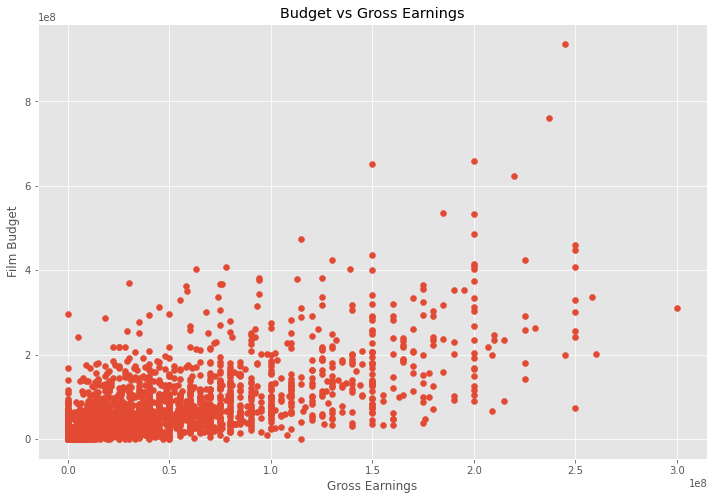

In [70]:
# Scatter plot to compare budget vs gross revenue

plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Film Budget')

plt.show()



In [71]:
df.head()

,name,rating,genre,year,released,score,director,writer,star,country,budget,gross,company,runtime,yearcorrect
2903,Star Wars: The Force Awakens,PG-13,Action,2015,18/12/2015,8.1,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,USA,245000000,936662225,Lucasfilm,136,2015
2302,Avatar,PG-13,Action,2009,18/12/2009,7.8,James Cameron,James Cameron,Sam Worthington,UK,237000000,760507625,Twentieth Century Fox Film Corporation,162,2009
1100,Titanic,PG-13,Drama,1997,19/12/1997,7.8,James Cameron,James Cameron,Leonardo DiCaprio,USA,200000000,658672302,Twentieth Century Fox Film Corporation,194,1997
2916,Jurassic World,PG-13,Action,2015,12/06/2015,7.0,Colin Trevorrow,Rick Jaffa,Chris Pratt,USA,150000000,652270625,Universal Pictures,124,2015
2603,The Avengers,PG-13,Action,2012,04/05/2012,8.1,Joss Whedon,Joss Whedon,Robert Downey Jr.,USA,220000000,623357910,Marvel Studios,143,2012


<AxesSubplot:xlabel='budget', ylabel='gross'>

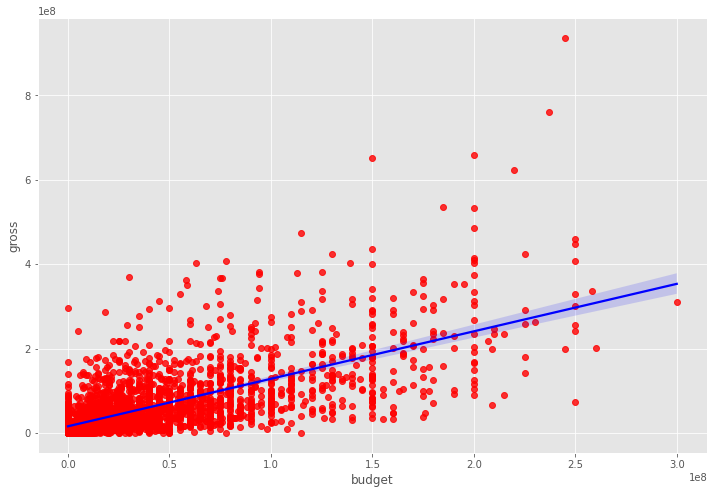

In [75]:
# Plot budget vs gross using seaborn

sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color": "red"}, line_kws={"color": "blue"})

In [77]:
# Looking at correlation

df.corr(method='pearson') # correlation methods: pearson (default), kendall, spearman

,year,score,budget,gross,runtime
year,1.000000,0.109251,0.374904,0.246975,0.127864
score,0.109251,1.000000,0.019061,0.171825,0.386864
budget,0.374904,0.019061,1.000000,0.682588,0.309652
gross,0.246975,0.171825,0.682588,1.000000,0.238183
runtime,0.127864,0.386864,0.309652,0.238183,1.000000


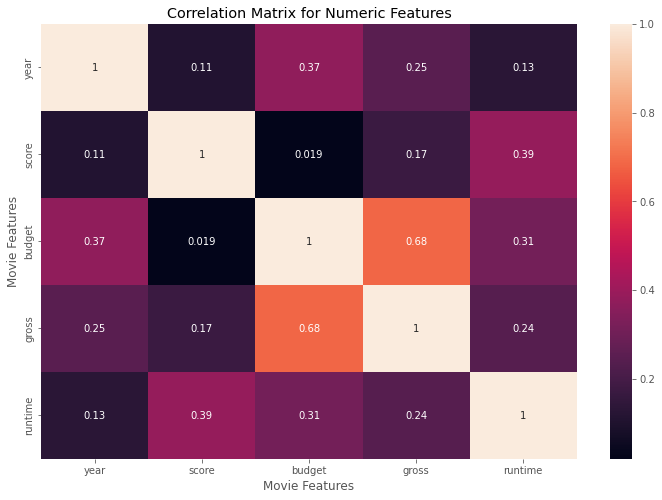

In [79]:
correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()

In [80]:
# look at Company

df.head()

,name,rating,genre,year,released,score,director,writer,star,country,budget,gross,company,runtime,yearcorrect
2903,Star Wars: The Force Awakens,PG-13,Action,2015,18/12/2015,8.1,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,USA,245000000,936662225,Lucasfilm,136,2015
2302,Avatar,PG-13,Action,2009,18/12/2009,7.8,James Cameron,James Cameron,Sam Worthington,UK,237000000,760507625,Twentieth Century Fox Film Corporation,162,2009
1100,Titanic,PG-13,Drama,1997,19/12/1997,7.8,James Cameron,James Cameron,Leonardo DiCaprio,USA,200000000,658672302,Twentieth Century Fox Film Corporation,194,1997
2916,Jurassic World,PG-13,Action,2015,12/06/2015,7.0,Colin Trevorrow,Rick Jaffa,Chris Pratt,USA,150000000,652270625,Universal Pictures,124,2015
2603,The Avengers,PG-13,Action,2012,04/05/2012,8.1,Joss Whedon,Joss Whedon,Robert Downey Jr.,USA,220000000,623357910,Marvel Studios,143,2012


In [84]:
df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes


df_numerized.head()

,name,rating,genre,year,released,score,director,writer,star,country,budget,gross,company,runtime,yearcorrect
2903,2146,5,0,2015,997,8.1,468,1106,236,37,245000000,936662225,574,136,32
2302,219,5,0,2009,996,7.8,478,768,986,36,237000000,760507625,837,162,26
1100,2852,5,6,1997,1047,7.8,478,768,699,37,200000000,658672302,837,194,13
2916,1246,5,0,2015,623,7.0,207,1545,203,37,150000000,652270625,846,124,32
2603,2276,5,0,2012,178,8.1,656,1010,946,37,220000000,623357910,596,143,29


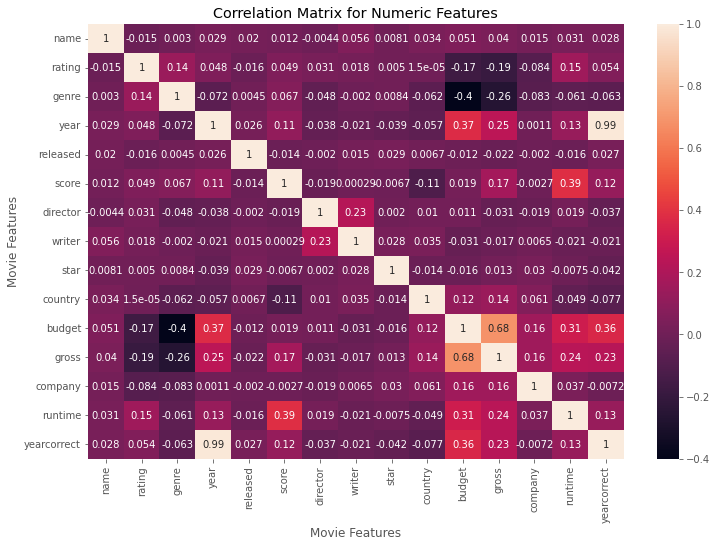

In [85]:
correlation_matrix = df_numerized.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()

In [86]:
df_numerized.corr()

,name,rating,genre,year,released,score,director,writer,star,country,budget,gross,company,runtime,yearcorrect
name,1.000000,-0.014934,0.002989,0.028571,0.020033,0.011649,-0.004434,0.055729,0.008144,0.034133,0.051049,0.039578,0.014947,0.031283,0.027916
rating,-0.014934,1.000000,0.136055,0.048356,-0.015758,0.048781,0.030589,0.017506,0.004985,0.000015,-0.171070,-0.191666,-0.083646,0.153396,0.054358
genre,0.002989,0.136055,1.000000,-0.072299,0.004501,0.067234,-0.048337,-0.001986,0.008380,-0.062478,-0.401052,-0.263051,-0.083068,-0.061327,-0.062951
year,0.028571,0.048356,-0.072299,1.000000,0.025509,0.109251,-0.037946,-0.021123,-0.039222,-0.057044,0.374904,0.246975,0.001121,0.127864,0.988856
released,0.020033,-0.015758,0.004501,0.025509,1.000000,-0.014246,-0.002037,0.014980,0.028721,0.006652,-0.012195,-0.021879,-0.002015,-0.015753,0.026836
score,0.011649,0.048781,0.067234,0.109251,-0.014246,1.000000,-0.018591,0.000293,-0.006750,-0.113568,0.019061,0.171825,-0.002730,0.386864,0.119092
director,-0.004434,0.030589,-0.048337,-0.037946,-0.002037,-0.018591,1.000000,0.227905,0.001973,0.010291,0.011052,-0.031221,-0.018730,0.018846,-0.036772
writer,0.055729,0.017506,-0.001986,-0.021123,0.014980,0.000293,0.227905,1.000000,0.027501,0.035367,-0.031269,-0.017184,0.006527,-0.020986,-0.020759
star,0.008144,0.004985,0.008380,-0.039222,0.028721,-0.006750,0.001973,0.027501,1.000000,-0.014146,-0.016357,0.013428,0.030054,-0.007494,-0.042013
country,0.034133,0.000015,-0.062478,-0.057044,0.006652,-0.113568,0.010291,0.035367,-0.014146,1.000000,0.118863,0.138064,0.061089,-0.049398,-0.077120


In [87]:
correlation_mat =  df_numerized.corr()

corr_pairs =  correlation_mat.unstack()

corr_pairs

name         name           1.000000
             rating        -0.014934
             genre          0.002989
             year           0.028571
             released       0.020033
                              ...   
yearcorrect  budget         0.357906
             gross          0.231577
             company       -0.007162
             runtime        0.127333
             yearcorrect    1.000000
Length: 225, dtype: float64

In [94]:
corr_pairs.gross

name           0.039578
rating        -0.191666
genre         -0.263051
year           0.246975
released      -0.021879
score          0.171825
director      -0.031221
writer        -0.017184
star           0.013428
country        0.138064
budget         0.682588
gross          1.000000
company        0.156013
runtime        0.238183
yearcorrect    0.231577
dtype: float64

In [95]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

genre        budget        -0.401052
budget       genre         -0.401052
genre        gross         -0.263051
gross        genre         -0.263051
             rating        -0.191666
                              ...   
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
Length: 225, dtype: float64

In [103]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]

high_corr

gross        budget         0.682588
budget       gross          0.682588
year         yearcorrect    0.988856
yearcorrect  year           0.988856
name         name           1.000000
writer       writer         1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
director     director       1.000000
score        score          1.000000
released     released       1.000000
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
dtype: float64

In [104]:
high_corr_not_self = high_corr[(high_corr) < 1.0]

high_corr_not_self

gross        budget         0.682588
budget       gross          0.682588
year         yearcorrect    0.988856
yearcorrect  year           0.988856
dtype: float64